###Μηχανική Μάθηση
####1η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ -Ακ. Έτος 2024-25



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

 `⚠️  Το σύνολο δεδομένων που σας δόθηκε δεν πρέπει να εμπλουτισθεί με οποιοδήποτε τρόπο. Η εργασία στην οποία θα χρησιμοποιηθεί εμπλουτισμένο σύνολο δεδομένων, δεν θα διορθωθεί.`

Ονοματεπώνυμο φοιτητή:

Α.Μ.: Γιάννης Τσακάλη

### 1. Εισαγωγή συνόλου δεδομένων

Tο σύνολο δεδομένων για το training-validation μπορείτε να το κατεβάσετε από [εδώ](https://drive.google.com/file/d/1ro8ff5KZwErgkxIvb3D5ykp2l5nV75Yj/view?usp=sharing).


1.α. Φορτώστε το σύνολο δεδομένων "train-val.csv"  στο notebook σας.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ML2024/train-val.csv')
df.head()

Mounted at /content/drive


,ID,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,3423,2016-03-04,Tuggeranong,14.4,32.2,11.0,NaN,NaN,NE,22.0,...,81.0,32.0,1021.6,1018.0,NaN,NaN,18.4,31.2,1,0
1,6095,2013-06-23,GoldCoast,11.0,21.5,0.0,NaN,NaN,S,43.0,...,64.0,58.0,1024.1,1021.2,NaN,NaN,17.1,20.2,0,0
2,403,2009-07-05,Cobar,8.3,14.7,0.0,2.4,7.4,SSW,24.0,...,79.0,55.0,1021.8,1019.7,7.0,6.0,10.6,14.0,0,0
3,333,2014-10-12,BadgerysCreek,8.8,32.2,0.0,NaN,NaN,ENE,37.0,...,65.0,18.0,1017.5,1011.7,NaN,NaN,17.7,30.9,0,0
4,2085,2012-07-04,Sydney,7.2,16.2,0.0,3.6,6.4,NaN,NaN,...,55.0,43.0,1024.6,1025.1,3.0,7.0,9.6,15.9,0,1


### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA)
Χρησιμοποιήστε code cells  με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων και text cells για επεξήγηση των αποτελεσμάτων.

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων,

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών,

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

In [2]:
# Number of samples
num_samples = df.shape[0]

#Number of features
num_features = df.drop(columns=['RainTomorrow']).shape[1]

print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

Number of samples: 7262
Number of features: 23


In [3]:
#Dataframe containing only features
df_features = df

#Display data type and non-null count of each feature
feature_info = pd.DataFrame({
    'Data Type': df_features.dtypes,
    'Non-Null Count': df_features.notnull().sum(),
    'Missing Percentage': (df_features.isnull().sum()/len(df_features))*100
})

print("Feature data types and non-null counts:\n")
print(feature_info)

#Count the number of features of each data type
dtype_counts = df_features.dtypes.value_counts()
print("\nNumber of Features by Data Type:\n")
print(dtype_counts)


Feature data types and non-null counts:

              Data Type  Non-Null Count  Missing Percentage
ID                int64            7262            0.000000
Date             object            7262            0.000000
Location         object            7262            0.000000
MinTemp         float64            7237            0.344258
MaxTemp         float64            7251            0.151473
Rainfall        float64            7262            0.000000
Evaporation     float64            4223           41.847976
Sunshine        float64            3817           47.438722
WindGustDir      object            6787            6.540898
WindGustSpeed   float64            6789            6.513357
WindDir9am       object            6692            7.849077
WindDir3pm       object            7049            2.933076
WindSpeed9am    float64            7207            0.757367
WindSpeed3pm    float64            7128            1.845222
Humidity9am     float64            7185            1.060314

In [4]:
#Display the feature labels (column names)
print("Feature Labels:\n")
print(df_features.columns.tolist())

Feature Labels:

['ID', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [5]:
#Count the number of unique categories in the clas label 'RainTomorrow'
num_categories = df['RainTomorrow'].nunique()
print(f"Number of categories in 'RainTomorrow': {num_categories}")

Number of categories in 'RainTomorrow': 2


In [6]:
#Count the number of samples in each class of 'RainTomorrow'
class_counts = df['RainTomorrow'].value_counts()
print("Number of samples in each class of 'RainTomorrow':\n")
print(class_counts)

#Calculate the imbalance ratio
imbalance_ratio = class_counts[1]/class_counts[0]
print(f"\nImbalance Ratio (Rain : No Rain): {imbalance_ratio:.2f}")

Number of samples in each class of 'RainTomorrow':

RainTomorrow
0    5623
1    1639
Name: count, dtype: int64

Imbalance Ratio (Rain : No Rain): 0.29


In [7]:
#Create a Dataframe with only numerical features
num_features_df = df_features.select_dtypes(include=['int64', 'float64'])

#Calculate the correlation matrix for numerical features in df_features
correlation_matrix = num_features_df.corr()

#Display the correlation matrix
print("Correlation Matrix:\n")
print(correlation_matrix)

# Calculate correlation between each feature in `num_features_df` and `RainTomorrow` from `df`
correlation_with_target = num_features_df.corrwith(df['RainTomorrow'])

# Display the 1xfeatures matrix
print("\nCorrelation of each numerical feature with RainTomorrow:\n", correlation_with_target)

Correlation Matrix:

                     ID   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
ID             1.000000  0.101510  0.133521 -0.032217     0.071010  0.051325   
MinTemp        0.101510  1.000000  0.709894  0.093915     0.460272  0.064273   
MaxTemp        0.133521  0.709894  1.000000 -0.098454     0.571740  0.469705   
Rainfall      -0.032217  0.093915 -0.098454  1.000000    -0.074776 -0.182762   
Evaporation    0.071010  0.460272  0.571740 -0.074776     1.000000  0.348179   
Sunshine       0.051325  0.064273  0.469705 -0.182762     0.348179  1.000000   
WindGustSpeed  0.043297  0.165904  0.008927  0.182268     0.168108 -0.068132   
WindSpeed9am   0.069138  0.199696  0.009758  0.127017     0.207150  0.020779   
WindSpeed3pm   0.030900  0.192065  0.057063  0.093557     0.135517  0.047236   
Humidity9am   -0.117635 -0.227187 -0.485498  0.204239    -0.502250 -0.463217   
Humidity3pm   -0.075666  0.023297 -0.493780  0.235734    -0.373950 -0.621705   
Pressure9am   -0.08

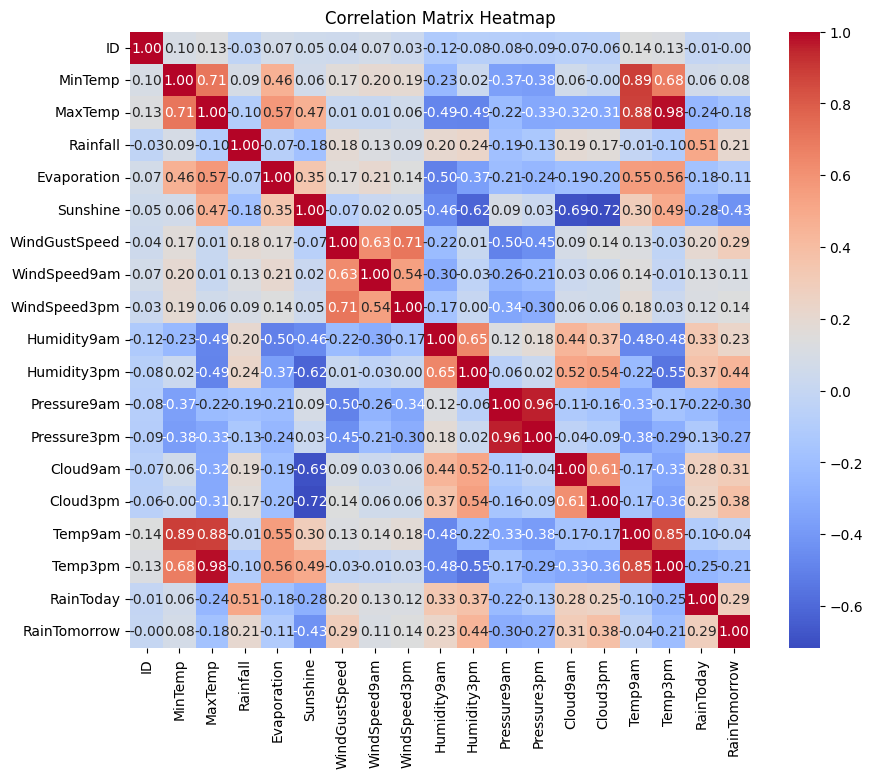

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
#Plot a heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot =True, cmap='coolwarm',fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [9]:
numerical_descriptive_stats = num_features_df.describe()
print("Numerical Descriptive Statistics:\n")
print(numerical_descriptive_stats)
#for categorical features
categorical_columns = df_features.select_dtypes(include=['object']).columns
for col in categorical_columns:
  print(f"\nFrequency distribution for {col} :\n",df_features[col].value_counts(normalize=True)*100)


Numerical Descriptive Statistics:

                ID      MinTemp      MaxTemp     Rainfall  Evaporation  \
count  7262.000000  7237.000000  7251.000000  7262.000000  4223.000000   
mean   4849.619113    10.638345    21.524562     2.302782     4.699005   
std    2787.027799     5.994250     6.482395     8.027407     3.761805   
min       2.000000    -7.600000    -3.700000     0.000000     0.000000   
25%    2441.500000     6.400000    16.900000     0.000000     2.200000   
50%    4857.000000    10.300000    20.800000     0.000000     4.000000   
75%    7245.750000    14.500000    25.800000     0.800000     6.400000   
max    9683.000000    28.100000    42.800000   174.600000    50.800000   

          Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
count  3817.000000    6789.000000   7207.000000   7128.000000  7185.000000   
mean      7.356930      39.160701     13.674622     18.227273    70.242171   
std       3.539593      13.846248      8.918759      8.858489   

 ⚠️ Κατά την προεπεξεργασία του συνόλου δεδομένων (τόσο του train-val όσο και του test) **MHN ΑΦΑΙΡΕΣΕΤΕ ΤΗΝ ΣΤΗΛΗ ID**  διότι χρειάζεται για τον διαγωνισμό kaggle.

### 3. Προεπεξεργασία συνόλου δεδομένων
💡`Χρησιμοποιήστε το Column Transformer για τη δημιουργία και την εφαρμογή χωριστών μετασχηματιστών για αριθμητικά και κατηγορικά δεδομένα.`




3.α.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ταξινομητών ή θα επιλέξετε κάποια από αυτά;  Θα κάνετε κάποια συνένωση κάποιων χαρακτηριστικών για δημιουργία νέων χαρακτηριστικών για το μοντέλο σας;


In [10]:
# Make a copy of the original DataFrame
df_selected = df.copy()

3.β. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

3.γ. Γράψτε κώδικα για την κατάλληλη μετατροπή των κατηγορικών μεταβλητών ώστε να μπορούν να τους διαχειριστούν οι ταξινομητές που θα χρησιμοποιήσετε.

3.δ. Γράψτε κώδικα για την κλιμάκωση των χαρακτηριστικών, αν την θεωρείτε απαραίτητη

In [11]:
#3βγδ
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# Feature engineering for numerical columns
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.feature_names_in_ = X.columns if isinstance(X, pd.DataFrame) else None
        return self

    def transform(self, X):
        # Ensure the input is a DataFrame
        X = pd.DataFrame(X, columns=self.feature_names_in_) if not isinstance(X, pd.DataFrame) else X.copy()

        # Create engineered features
        X['TempRange'] = X['MaxTemp'] - X['MinTemp']
        X['PressureAvg'] = (X['Pressure9am'] + X['Pressure3pm']) / 2

        # Drop redundant columns
        columns_to_drop = ['MaxTemp', 'MinTemp', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Evaporation']
        X.drop(columns=columns_to_drop, errors='ignore', inplace=True)

        return X

# Function for encoding WindGustDir into sine and cosine
def wind_gust_dir_to_sin_cos(data):
    df = pd.DataFrame(data, columns=['WindGustDir'])
    direction_map = {
        'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 'E': 90,
        'ESE': 112.5, 'SE': 135, 'SSE': 157.5, 'S': 180,
        'SSW': 202.5, 'SW': 225, 'WSW': 247.5, 'W': 270,
        'WNW': 292.5, 'NW': 315, 'NNW': 337.5
    }
    df['WindGustDirDegrees'] = df['WindGustDir'].map(direction_map)
    return pd.DataFrame({
        'WindGustDirSin': np.sin(np.deg2rad(df['WindGustDirDegrees'])),
        'WindGustDirCos': np.cos(np.deg2rad(df['WindGustDirDegrees']))
    })

# Function for calculating wind direction shifts and adding sine/cosine of WindDir9am
def wind_dir_to_shift(data):
    df = pd.DataFrame(data, columns=['WindDir9am', 'WindDir3pm'])
    direction_map = {
        'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 'E': 90,
        'ESE': 112.5, 'SE': 135, 'SSE': 157.5, 'S': 180,
        'SSW': 202.5, 'SW': 225, 'WSW': 247.5, 'W': 270,
        'WNW': 292.5, 'NW': 315, 'NNW': 337.5
    }
    df['WindDir9amDegrees'] = df['WindDir9am'].map(direction_map)
    df['WindDir3pmDegrees'] = df['WindDir3pm'].map(direction_map)

    # Calculate wind shift
    df['WindShift'] = df['WindDir3pmDegrees'] - df['WindDir9amDegrees']
    df['WindShiftNormalized'] = (df['WindShift'] + 180) % 360 - 180


    # Calculate sine and cosine for WindDir9am
    df['WindDir9amSin'] = np.sin(np.deg2rad(df['WindDir9amDegrees']))
    df['WindDir9amCos'] = np.cos(np.deg2rad(df['WindDir9amDegrees']))

    return df[['WindShiftNormalized', 'WindDir9amSin', 'WindDir9amCos']]

# Function to extract month as sine and cosine
def date_to_month(data):
    data = pd.DataFrame(data, columns=['Date'])
    data['Date'] = pd.to_datetime(data['Date'])

    # Extract month and convert to sine/cosine
    month = data['Date'].dt.month
    month_sin = np.sin(2 * np.pi * month / 12)
    month_cos = np.cos(2 * np.pi * month / 12)

    return pd.DataFrame({
        'MonthSin': month_sin,
        'MonthCos': month_cos
    })

# Pipelines for specific features
wind_shift_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('calculate_shift_and_sin_cos', FunctionTransformer(wind_dir_to_shift, validate=False)),
    ('scaler', MinMaxScaler(feature_range=(-1, 1)))
])

wind_gust_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encode_sin_cos', FunctionTransformer(wind_gust_dir_to_sin_cos, validate=False)),
    ('scaler', MinMaxScaler(feature_range=(-1, 1)))
])

date_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('month_features', FunctionTransformer(date_to_month, validate=False)),
    ('scaler', MinMaxScaler(feature_range=(-1, 1)))
])

location_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')),
    ('scaler', MinMaxScaler(feature_range=(-1, 1)))
])

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler(feature_range=(-1, 1)))  # Scale numerical features
])

numerical_features = [
    'ID', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
    'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm',
    'RainToday', 'TempRange', 'PressureAvg'
]

column_transformer = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('wind_shift', wind_shift_pipeline, ['WindDir9am', 'WindDir3pm']),
        ('location', location_pipeline, ['Location']),
        ('wind_gust', wind_gust_pipeline, ['WindGustDir']),
        ('date', date_pipeline, ['Date']),  # Use the new month-based pipeline
    ],
    remainder='passthrough'
)

preprocessor = Pipeline([
    ('feature_engineering', FeatureEngineer()),
    ('column_transformer', column_transformer)
])


3.ε. Εκτελέστε όλα τα προηγούμενα βήμα προεκπαίδευσης (χρήση μετασχηματιστών) ώστε να είναι "καθαρό" το αρχικό σύνολο για να χρησιμοποιηθεί για την εκπαίδευση των ταξινομητών.

In [12]:
X_processed = preprocessor.fit_transform(df_selected.drop(['RainTomorrow'], axis=1))

3.στ. Αφού έχετε "καθαρίσει" το αρχικό σύνολο εκπαίδευσης, γράψτε τον κατάλληλο κώδικα ώστε από το αρχικό σύνολο εκπαίδευσης να δημιουργήσετε τα σύνολα Χ και y.

💡 `Η στήλη 'RainTomorrow' είναι η τιμή που θέλουμε να προβλέψει ο ταξινομητής μας.`



In [13]:
X = X_processed
y = df_selected['RainTomorrow']

3.ζ. Διαχωρίστε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σε σύνολο επικύρωσης (validation set) (ο διαχωρισμός να είναι train set 70% και validation set 30%).


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=43)

### 4. Εκπαίδευση μοντέλου με default τιμές στις παραμέτρους των ταξινομητών

Θα εκπαιδεύσουμε τους ακόλουθους ταξινομητές με το σύνολο εκπαίδευσης των δεδομένων μας:
1. Naive Bayes
2. KNeighborsClassifier
3. LogisticRegression
4. MLP με ένα κρυφό επίπεδο
5. SVC
6. Decision Tree
7. Random Forest


In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

 4.α. Εκπαιδεύστε (fit)  και τους  7 ταξινομητές που προαναφέρθηκαν (εμφανίστε τα δείγματα από το train set μαζί με την ετικέτα τους στην είσοδο του κάθε ταξινομητή), χρησιμοποιώντας τις default τιμές για όλες τις παραμέτρους τους.

In [16]:
classifiers = {
    'Naive Bayes': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'MLP': MLPClassifier(max_iter=400),
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, classifier in classifiers.items():
    print(f"Training {name}...")
    classifier.fit(X_train, y_train)


Training Naive Bayes...
Training KNeighborsClassifier...
Training LogisticRegression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training MLP...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Training SVC...
Training Decision Tree...
Training Random Forest...


4.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [17]:
predictions = {}
for name, classifier in classifiers.items():
    predictions[name] = classifier.predict(X_val)


4.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [18]:
f1_scores = {}
for name, prediction in predictions.items():
    f1_scores[name] = f1_score(y_val, prediction)
    print(f"F1 Score for {name}: {f1_scores[name]}")

F1 Score for Naive Bayes: 0.45933014354066987
F1 Score for KNeighborsClassifier: 0.44201909959072305
F1 Score for LogisticRegression: 0.5949535192563081
F1 Score for MLP: 0.5794183445190156
F1 Score for SVC: 0.5650349650349651
F1 Score for Decision Tree: 0.5076923076923077
F1 Score for Random Forest: 0.5818181818181818


4.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


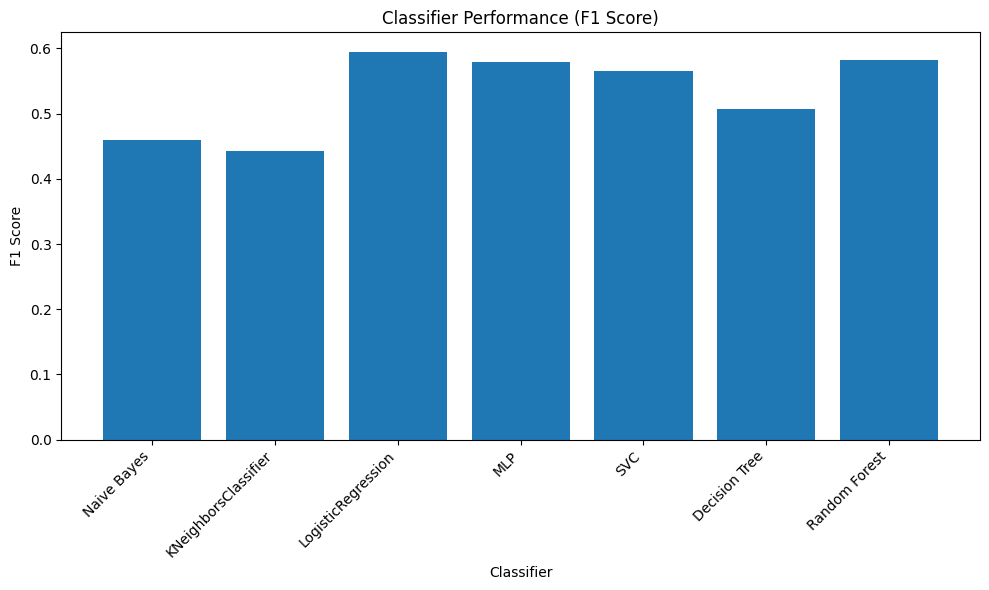


The best performing classifier is: LogisticRegression with an F1 score of 0.5949535192563081


In [19]:
plt.figure(figsize=(10, 6))
plt.bar(f1_scores.keys(), f1_scores.values())
plt.title('Classifier Performance (F1 Score)')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show() # Execute the code yourself to see the output.
best_classifier_name = max(f1_scores, key=f1_scores.get)
print(f"\nThe best performing classifier is: {best_classifier_name} with an F1 score of {f1_scores[best_classifier_name]}")


### 5. Προετοιμασία αρχείου για την πρώτη υποβολή στο kaggle

In [20]:
test_df = pd.read_csv('/content/drive/MyDrive/ML2024/test.csv')

5.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις, χρησιμοποιώντας το [test set](https://drive.google.com/file/d/14HsEya9h1wxk2wJLh6c0Ibz2V4_WA13p/view?usp=sharing).


In [21]:
X_test_processed = preprocessor.transform(test_df.drop(['RainTomorrow'], axis=1, errors='ignore'))  #
best_classifier = classifiers[best_classifier_name]
predictions_test = best_classifier.predict(X_test_processed)

5.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη ID του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 5α).

In [ ]:
submission_df = pd.DataFrame({'ID': test_df['ID'], 'RainTomorrow': predictions_test})
print(submission_df.head())
# Save the DataFrame to a CSV file
submission_df.to_csv('submission1.csv', index=False)

     ID  RainTomorrow
0  8790             1
1  2095             0
2  4316             0
3  6075             0
4   347             0


### 6. Βελτιστοποίηση μοντέλων με εύρεση καλύτερων υπερπαραμέτρων των ταξινομητών

6.α. Για τους 7 ταξινομητές βελτιστοποιήστε την επίδοσή τους χρησιμοποιώντας αναζήτηση πλέγματος με διασταυρούμενη επικύρωση (k-fold 5)  με σκοπό την εύρεση των βέλτιστων υπερπαραμέτρων.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Adjusted parameter grids for each classifier
param_grids = {
    'Naive Bayes': {
        # No hyperparameters for GaussianNB, using default settings
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7],  # Reduced range of neighbors
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'LogisticRegression': {
        'penalty': ['l2'],                # Focus on l2 regularization
        'C': [0.1, 1, 10],                # Generalized range for regularization
        'solver': ['liblinear'],          # Compatible with l2
        'max_iter': [100, 500]            # Sufficient for convergence
    },
    'MLP': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Fewer configurations
        'activation': ['tanh'],                           # Focused on tanh
        'solver': ['adam'],                               # Reliable solver
        'alpha': [0.0001, 0.001],                         # Regularization strength
        'learning_rate': ['constant'],                    # Fixed learning rate
        'max_iter': [400]                                 # Standard iteration limit
    },
    'SVC': {
        'C': [0.1, 1, 10],           # General range for C
        'kernel': ['linear', 'rbf'], # Limited to common kernels
        'gamma': ['scale', 'auto']   # Standard gamma options
    },
    'Decision Tree': {
        'criterion': ['gini'],             # Removed log_loss for simplicity
        'max_depth': [10, 20, None],       # Reasonable depth options
        'min_samples_split': [2, 10]       # Common split thresholds
    },
    'Random Forest': {
        'n_estimators': [50, 100],         # Common numbers of estimators
        'criterion': ['gini'],
        'max_depth': [10, 20, None],       # Standard depth range
        'min_samples_split': [2, 10]       # Usual splits
    }
}

# Dictionary to store the best estimators
best_estimators = {}

# Loop through each classifier and perform GridSearchCV
for name, classifier in classifiers.items():
    print(f"Tuning {name}...")
    if name not in param_grids or not param_grids[name]:
        print(f"No hyperparameters to tune for {name}, using default settings.")
        best_estimators[name] = classifier.fit(X_train, y_train)
        continue

    grid_search = GridSearchCV(
        classifier,
        param_grids[name],
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=1  # Optional: Set to 2 for more detailed progress output
    )

    # Fit the grid search on the training data
    grid_search.fit(X_train, y_train)

    # Store the best estimator and print the best parameters and F1 score
    best_estimators[name] = grid_search.best_estimator_
    print(f"Best F1 Score for {name}: {grid_search.best_score_}")
    print(f"Best Parameters for {name}: {grid_search.best_params_}")

# Example: Access the best estimator for LogisticRegression
print("\nBest LogisticRegression Estimator:", best_estimators['LogisticRegression'])


Tuning Naive Bayes...
No hyperparameters to tune for Naive Bayes, using default settings.
Tuning KNeighborsClassifier...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best F1 Score for KNeighborsClassifier: 0.46813408657865957
Best Parameters for KNeighborsClassifier: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Tuning LogisticRegression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best F1 Score for LogisticRegression: 0.5966987148950981
Best Parameters for LogisticRegression: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Tuning MLP...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Best F1 Score for MLP: 0.6258212831660094
Best Parameters for MLP: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 400, 'solver': 'adam'}
Tuning SVC...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best F1 Score for SVC: 0.6186016976092046
Best Parameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Tuning Decision Tree...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best F1 Score for Decision Tree: 0.5396905053444447
Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}
Tuning Random Forest...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best F1 Score for Random Forest: 0.5968448899709509
Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}

Best LogisticRegression Estimator: LogisticRegression(C=10, solver='liblinear')


In [105]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Store the best classifiers with their hyperparameters
best_classifiers = {
    'Naive Bayes': GaussianNB(),  # No hyperparameters to tune
    'KNeighborsClassifier': KNeighborsClassifier(
        n_neighbors=3,
        weights='distance',
        metric='manhattan'
    ),
    'LogisticRegression': LogisticRegression(
        C=10,
        penalty='l2',
        solver='liblinear',
        max_iter=100
    ),
    'MLP': MLPClassifier(
        hidden_layer_sizes=(50,),
        activation='tanh',
        solver='adam',
        alpha=0.001,
        learning_rate='constant',
        max_iter=200,
        random_state=123
    ),
    'SVC': SVC(
        C=10,
        kernel='rbf',
        gamma='scale'
    ),
    'Decision Tree': DecisionTreeClassifier(
        criterion='gini',
        max_depth=10,
        min_samples_split=2
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=50,
        criterion='gini',
        max_depth=20,
        min_samples_split=2
    )
}

6.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [106]:

# Fit all classifiers on the training data
for name, classifier in best_classifiers.items():
    print(f"Fitting {name}...")
    classifier.fit(X_train, y_train)

# Make predictions on the validation data
predictions = {}
for name, classifier in best_classifiers.items():
    predictions[name] = classifier.predict(X_val)

# Example: Display predictions for one classifier
print("Predictions for LogisticRegression:", predictions['LogisticRegression'])


Fitting Naive Bayes...
Fitting KNeighborsClassifier...
Fitting LogisticRegression...
Fitting MLP...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting SVC...
Fitting Decision Tree...
Fitting Random Forest...
Predictions for LogisticRegression: [0 0 0 ... 0 0 0]



6.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [107]:
f1_scores = {}
for name, prediction in predictions.items():
    f1_scores[name] = f1_score(y_val, prediction)
    print(f"F1 Score for {name}: {f1_scores[name]}")

F1 Score for Naive Bayes: 0.45933014354066987
F1 Score for KNeighborsClassifier: 0.47291941875825627
F1 Score for LogisticRegression: 0.5928853754940712
F1 Score for MLP: 0.6393244873341375
F1 Score for SVC: 0.6142131979695431
F1 Score for Decision Tree: 0.5602923264311814
F1 Score for Random Forest: 0.5544827586206896


6.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


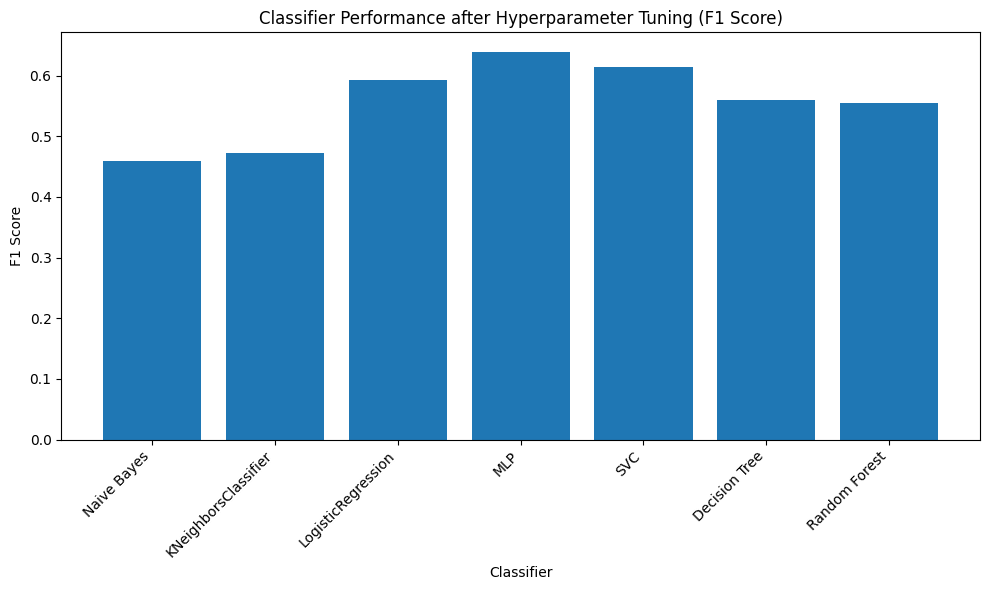


The best performing classifier is: MLP with an F1 score of 0.6393244873341375


In [108]:
plt.figure(figsize=(10, 6))
plt.bar(f1_scores.keys(), f1_scores.values())
plt.title('Classifier Performance after Hyperparameter Tuning (F1 Score)')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show() # Execute the code yourself to see the output.best_classifier_name = max(f1_scores, key=f1_scores.get)

best_classifier_name_improved = max(f1_scores, key=f1_scores.get)
print(f"\nThe best performing classifier is: {best_classifier_name_improved} with an F1 score of {f1_scores[best_classifier_name_improved]}")

### 7. Προετοιμασία αρχείου για τη δεύτερη υποβολή στο kaggle

7.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις χρησιμοποιώντας το δοθέν σύνολο εκπαίδευσης (test set).


In [ ]:
X_test_processed = preprocessor.transform(test_df.drop(['RainTomorrow'], axis=1, errors='ignore'))  #
best_classifier_improved = best_classifiers[best_classifier_name_improved]
predictions_test_improved = best_classifier_improved.predict(X_test_processed)

7.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 7α).

In [ ]:
submission_df_improved = pd.DataFrame({'ID': test_df['ID'], 'RainTomorrow': predictions_test_improved})
print(submission_df_improved.head())
# Save the DataFrame to a CSV file
submission_df_improved.to_csv('submission_improved1.csv', index=False)

     ID  RainTomorrow
0  8790             0
1  2095             0
2  4316             0
3  6075             0
4   347             0
